# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
%pip install scikeras

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
# libaries to help with data visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random

In [4]:
from keras import backend
# importing different functions to build models
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
#Importing classback API
from keras import callbacks
# Importing optimizers
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.optimizers import SGD

In [5]:
import tensorflow as tf

## Loading the dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataPath = '/content/drive/MyDrive/neural networks/Churn.csv'
data = pd.read_csv(dataPath)

## Data Overview

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
data.shape

(10000, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
data[data.duplicated()].count()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* The dataset consists of 10000 rows and 14 columns. It has three columns that are object datatype, the rest are numeric.
* There are no missing values in the dataset.
* There are no duplicate rows
* CustomerId column contains unique customer Ids, and can be safely dropped as it does not contribute anything useful to analysis. RowNumber and Surname columns can be dropped as well.
* There are three columns that are of int data type, but actually contain categorical data: HasCrCard, IsActiveMember, Exited. Each of these columns contain 2 unique values, as expected.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

In [14]:
df = data.drop(["CustomerId", "RowNumber", "Surname"], axis=1)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


* Average customer is around 39 years old, with a credit score of 650, has been with the bank approximately 5 years, makes about 100k per year, has one or two credit cards, and carries a balance of 76.5k.

In [16]:
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')
df['HasCrCard'] = df['HasCrCard'].astype('category')

Let's replace values in the categorical columns with actual values for readability

In [17]:
replaceStruct = {
                'HasCrCard': {0: 'No', 1:'Yes'},
                'IsActiveMember': {0: 'No', 1:'Yes'},
                'Exited': {0: 'No', 1:'Yes'},
                    }
df=df.replace(replaceStruct)

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


### Univariate Analysis

#### Helper Functions

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Credit Score

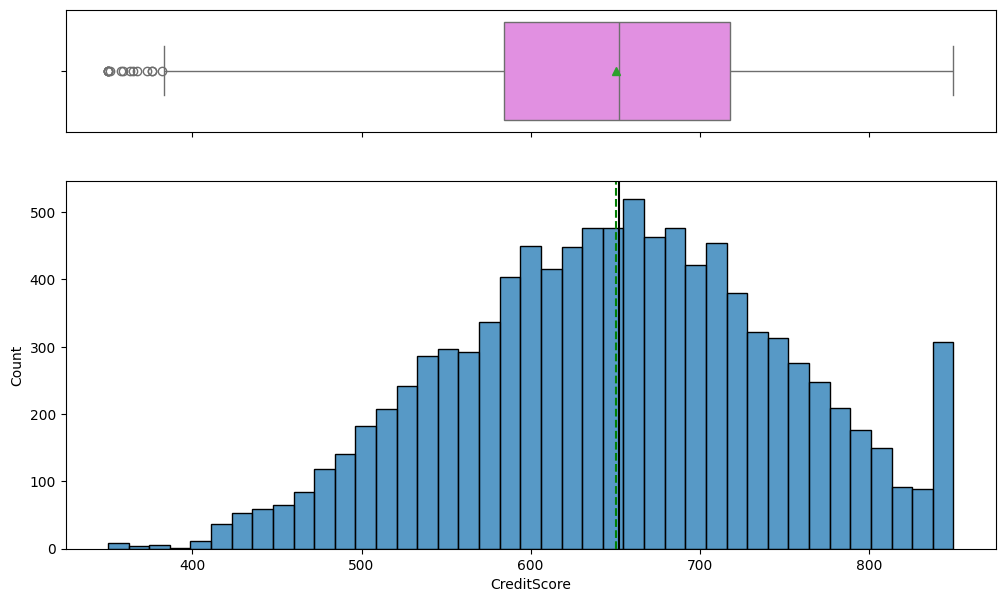

In [21]:
histogram_boxplot(df, 'CreditScore')

In [22]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [23]:
df[df['CreditScore'] <= 600]['CreditScore'].count()/df['CreditScore'].count()*100 # customers with Poor and Very Poor credit scores

30.659999999999997

In [24]:
df[df['CreditScore'] >= 781]['CreditScore'].count()/df['CreditScore'].count()*100 # customers with Excellent credit scores

9.5

In [25]:
df[df['CreditScore'].isin(range(661,781))]['CreditScore'].count()/df['CreditScore'].count()*100 # customers with Good credit scores

37.03

* This column contains outliers at the left end of the distribution
* 30% of the customers have Poor or Very Poor credit scores
* 46.5% of the customers have Good (37%) and Excellent (9.5%) credit scores

#### Observations on Geography

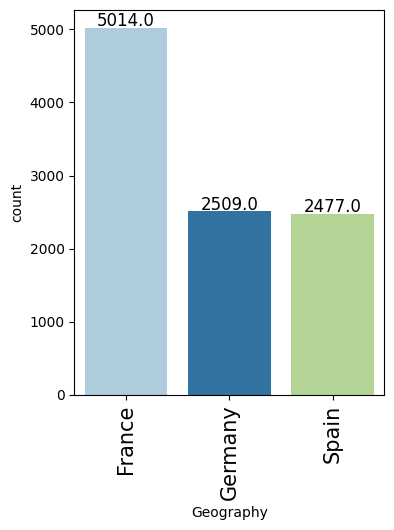

In [26]:
labeled_barplot(df,'Geography')

* Dataset consists of customers from three European countries - France, Germany, and Spain
* 50% of the customers live in France, the rest are evenly split between Germany and Spain

#### Observations on Gender

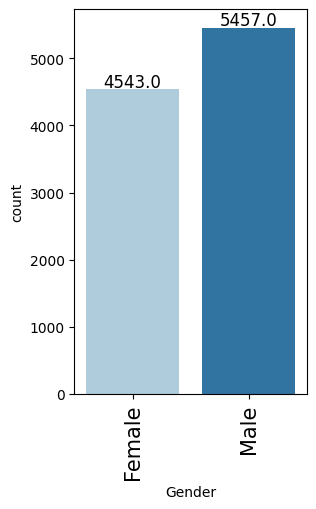

In [27]:
labeled_barplot(df, 'Gender')

* ~55% of the customers are male, ~45% are female

#### Observations on Age

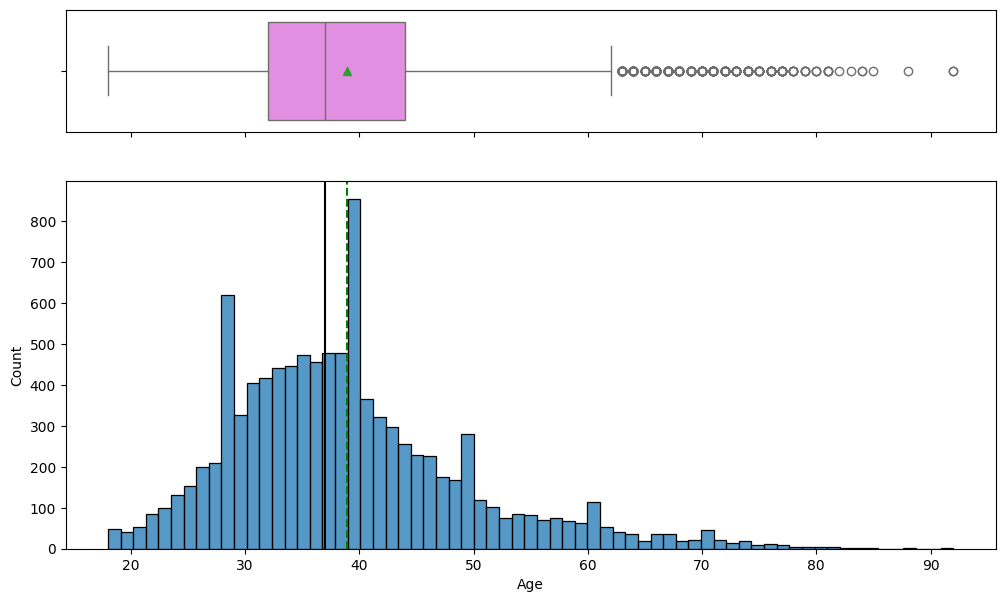

In [28]:
histogram_boxplot(df, 'Age')

In [29]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [30]:
df['Age'].value_counts().head(10)

37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
Name: Age, dtype: int64

* This column has a lot of outliers at the right end of the distribution
* Age of the customers ranges from 18 to 92 years old
* Typical customer is his / her thirties - early forties

#### Observations on Tenure

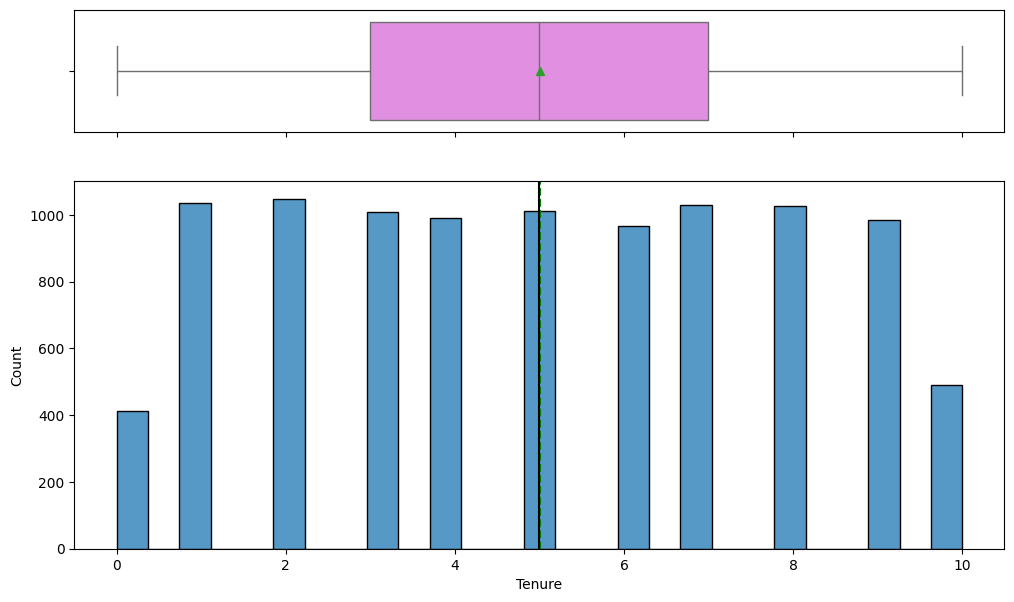

In [31]:
histogram_boxplot(df,'Tenure')

In [32]:
df['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [33]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

* There are no outliers in this colum
* This distribution is symmetric
* Tenure ranges from 0 to 10 years
* Average customer has been with the bank for 5 years
* The least frequently occuring catherogy are the new customers - those who've been with the bank for less than a year.
* In the last year bank acquired less than half of the new customers compared to previous yeard. Bank needs to investigate why.

#### Observations on Balance

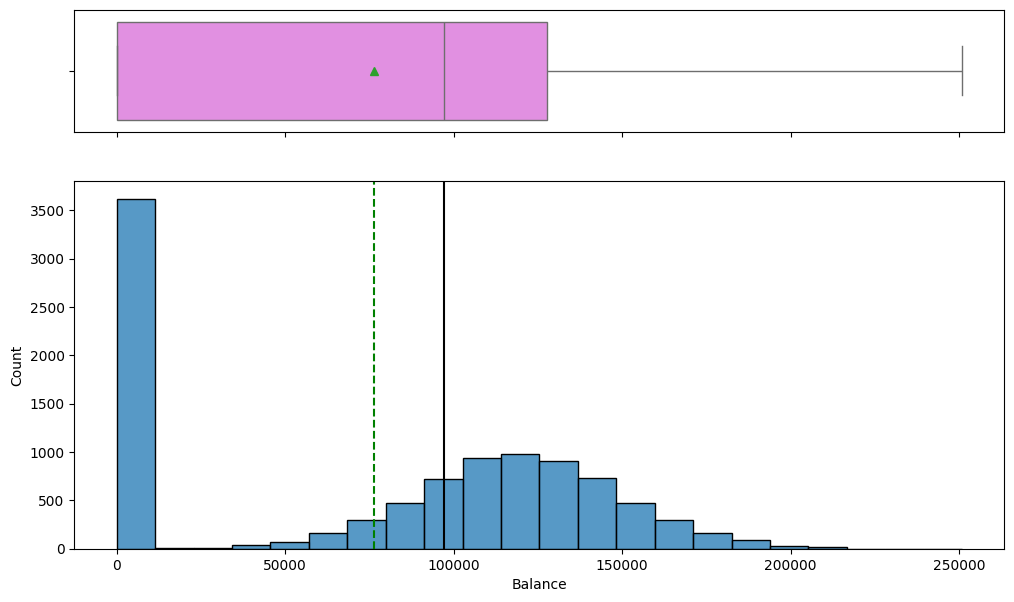

In [34]:
histogram_boxplot(df,'Balance')

In [35]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

* The distribution is skewed to the left
* There's one exceptionally tall bar at left side indicating that there are many occurrences of low balance amounts. Seems like there are two distinct clusters - customers with low balances and customers with with balances in 50K - 200K range (checking / credict cards accounts and mortgages / personal loans maybe?)
* 25% of the customers have zero balance
* maximum balance is ~250k

#### Observations on NumOfProducts

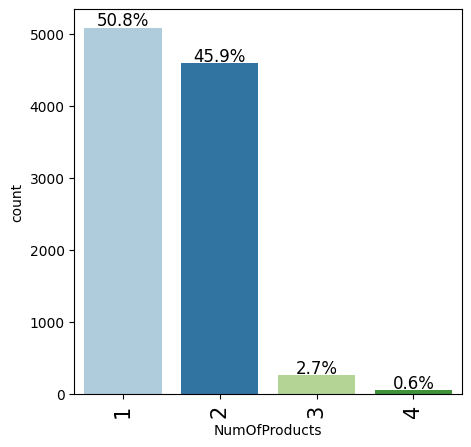

In [36]:
labeled_barplot(df,'NumOfProducts', perc=True)

* Most of the customers have purchased one or two products through the bank
* Less than 1% of the customers have purchased 4 products

#### Observations on HasCrCard

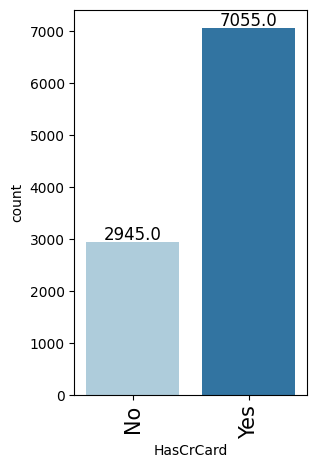

In [37]:
labeled_barplot(df, 'HasCrCard')

~ 29.5% of the customers don't have a credit card.

#### Observations on IsActiveMember

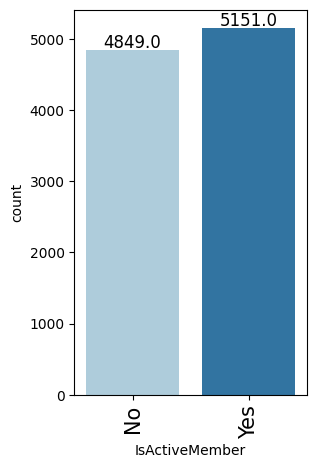

In [38]:
labeled_barplot(df,'IsActiveMember')

* 5151 (51.5%) customers in the dataset are Active Members
* 48.5 % of customers are not using bank products regularly

#### Observations on EstimatedSalary

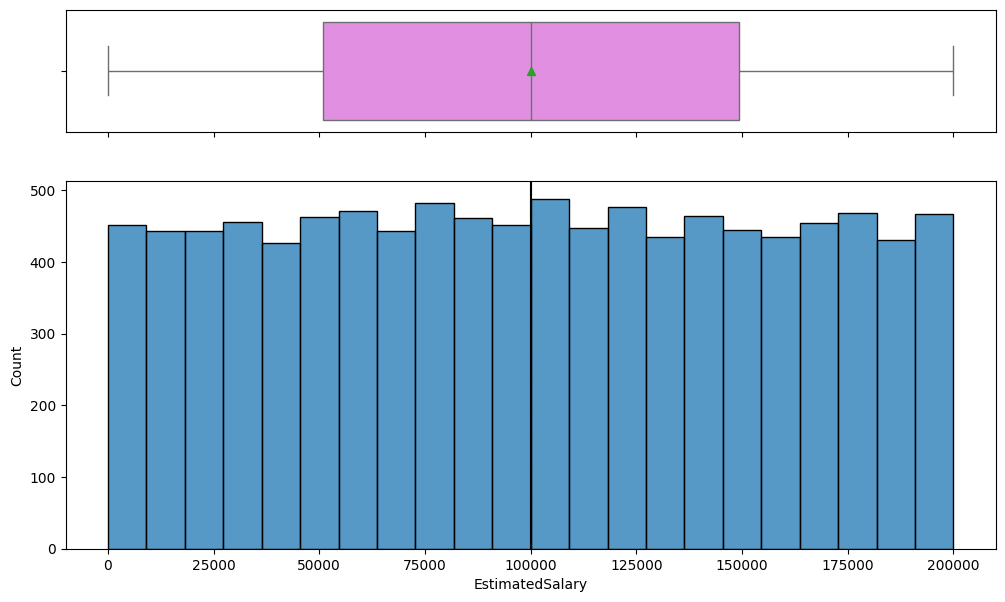

In [39]:
histogram_boxplot(df, 'EstimatedSalary')

In [40]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [41]:
df['EstimatedSalary'].sort_values().head(10)

2362     11.58
9647     90.07
9010     91.75
5548     96.27
4989    106.67
7565    123.07
2498    142.81
8722    143.34
4774    178.19
1451    216.27
Name: EstimatedSalary, dtype: float64

* This column doesn't contain any outliers
* The distribution is symmetric
* Minimum salary in the dataset is \$11.58, which is surprizingly low.
* Salary in the dataset ranges from \$11 to $200K.

#### Observations on Exited

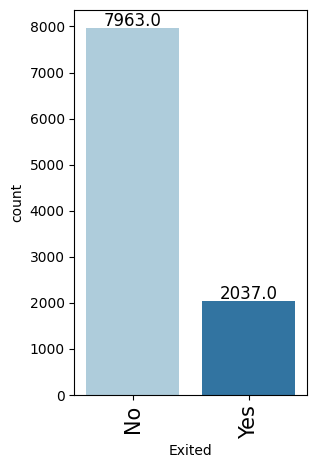

In [42]:
labeled_barplot(df,'Exited')

~ 20% of customers have left the bank within six months.

### Bivariate Analysis

#### Helper Functions

In [43]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [44]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation

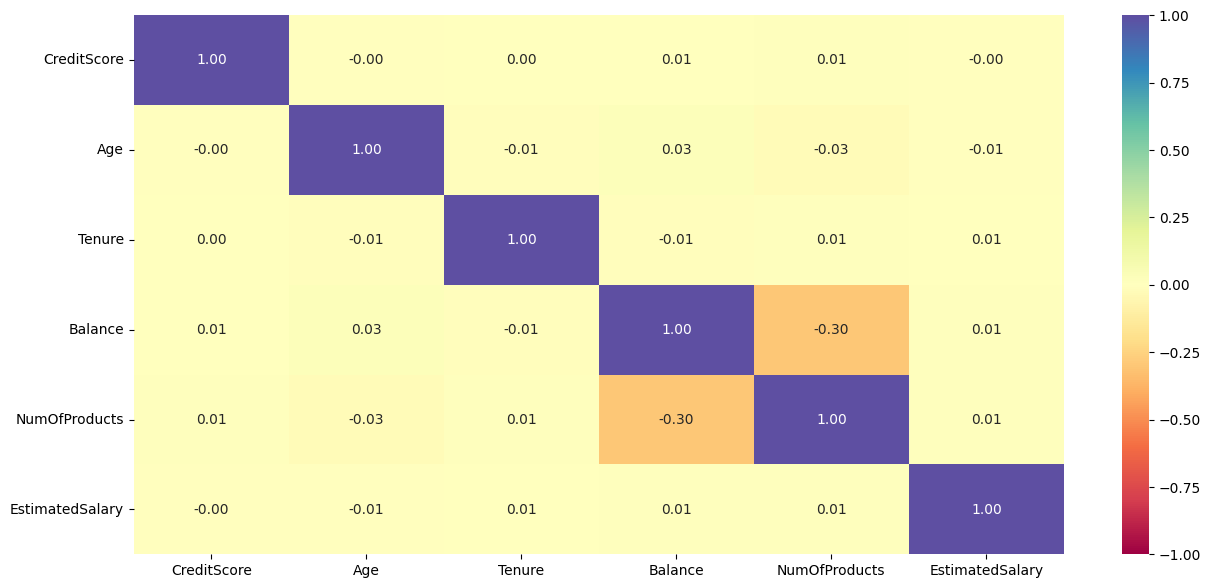

In [45]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")
plt.show()

* Account Balance and Number of Products are weakly negatively correlated
* The rest of the attributes are not correlated to each other

#### CreditScore vs Exited

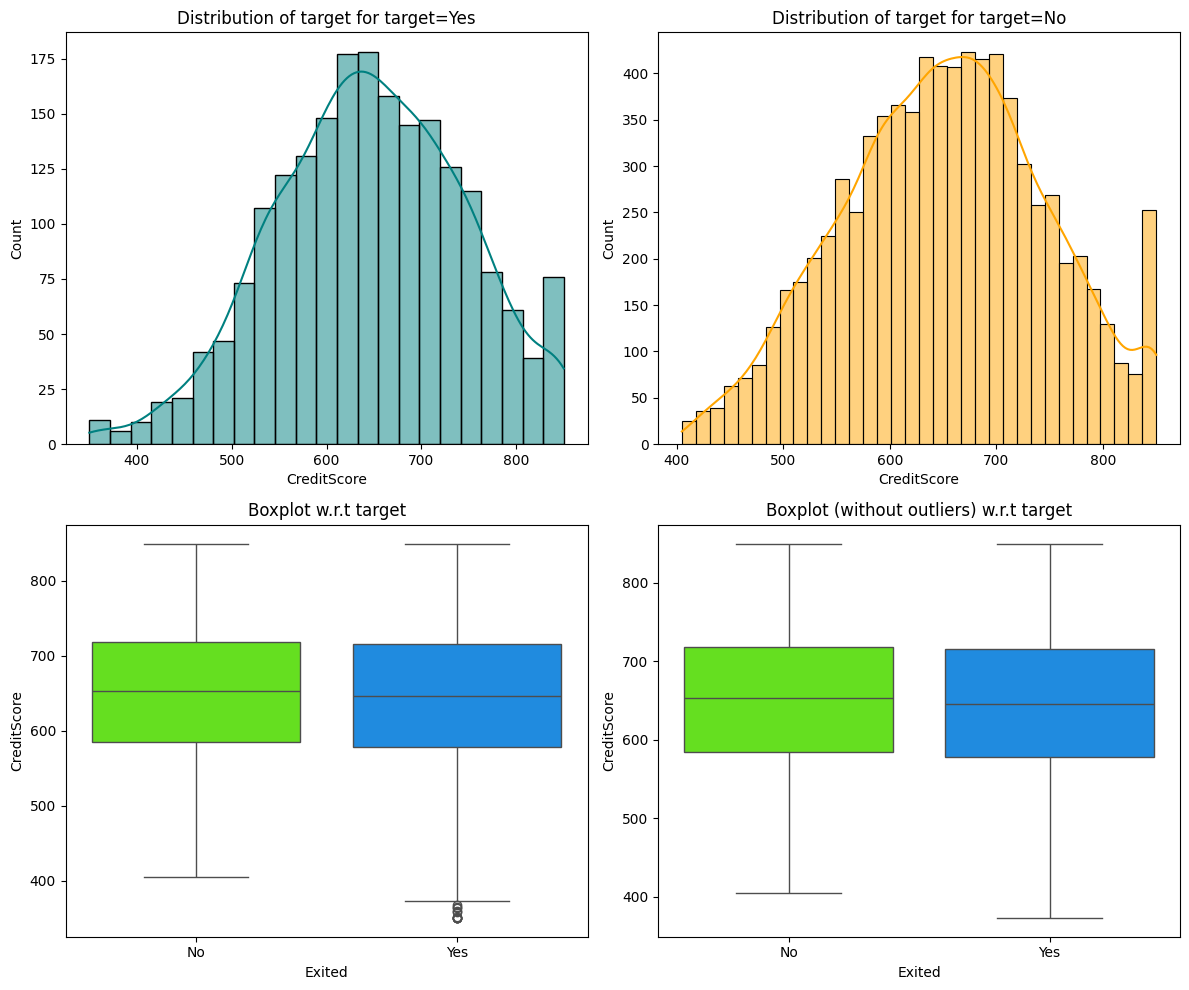

In [46]:
distribution_plot_wrt_target(df, 'CreditScore', 'Exited')

* Credit scores distributions for Exited and Not Exited customers are very similar.

#### Geography vs Exited

Exited       No   Yes    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


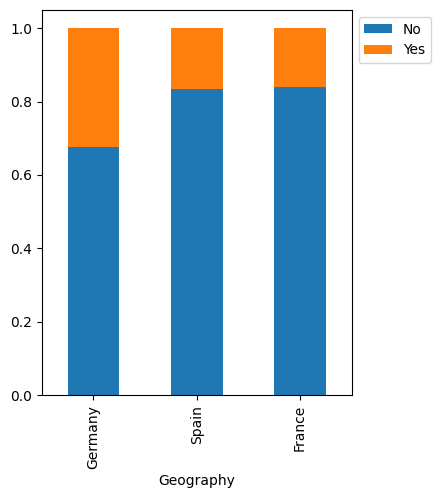

In [47]:
stacked_barplot(df, 'Geography', 'Exited')

* Customers from Germany are twice as likely to leave the bank within six months than customers from France or Spain.

#### Gender vs Exited

Exited    No   Yes    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


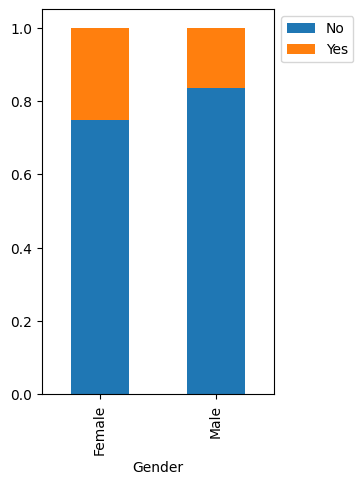

In [48]:
stacked_barplot(df, 'Gender', 'Exited')

* Female customers are more likely to leave the bank within six months.

#### Age vs Exited

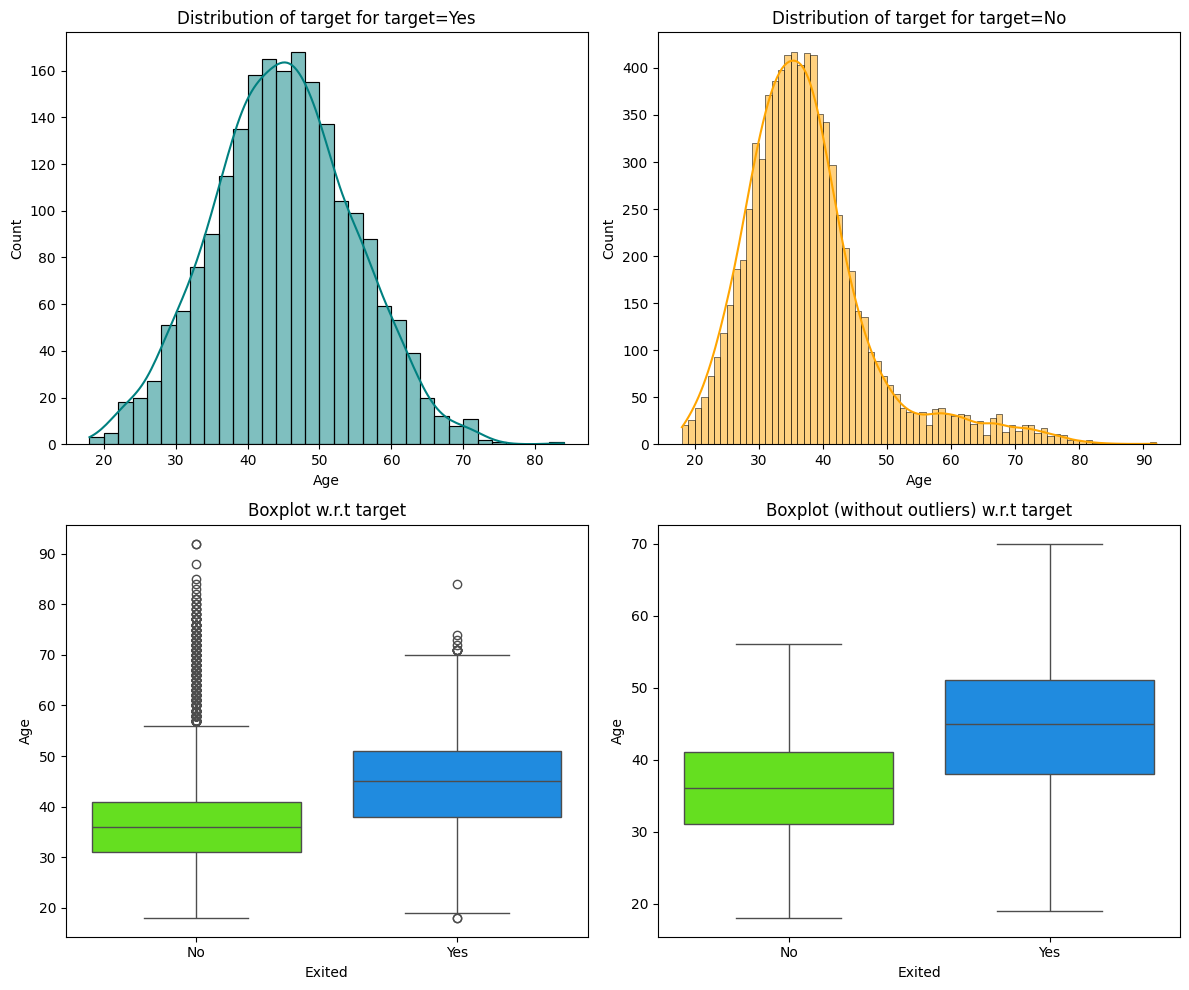

In [49]:
distribution_plot_wrt_target(df, 'Age', 'Exited')

* Older customers are more likely to exit the bank
* There are a lot of outliers at the upper end of the range in the Not Exited category. Bank shoould investigate what's makes these customers stay and consider applying the findings to other customers.

#### Tenure vs Exited

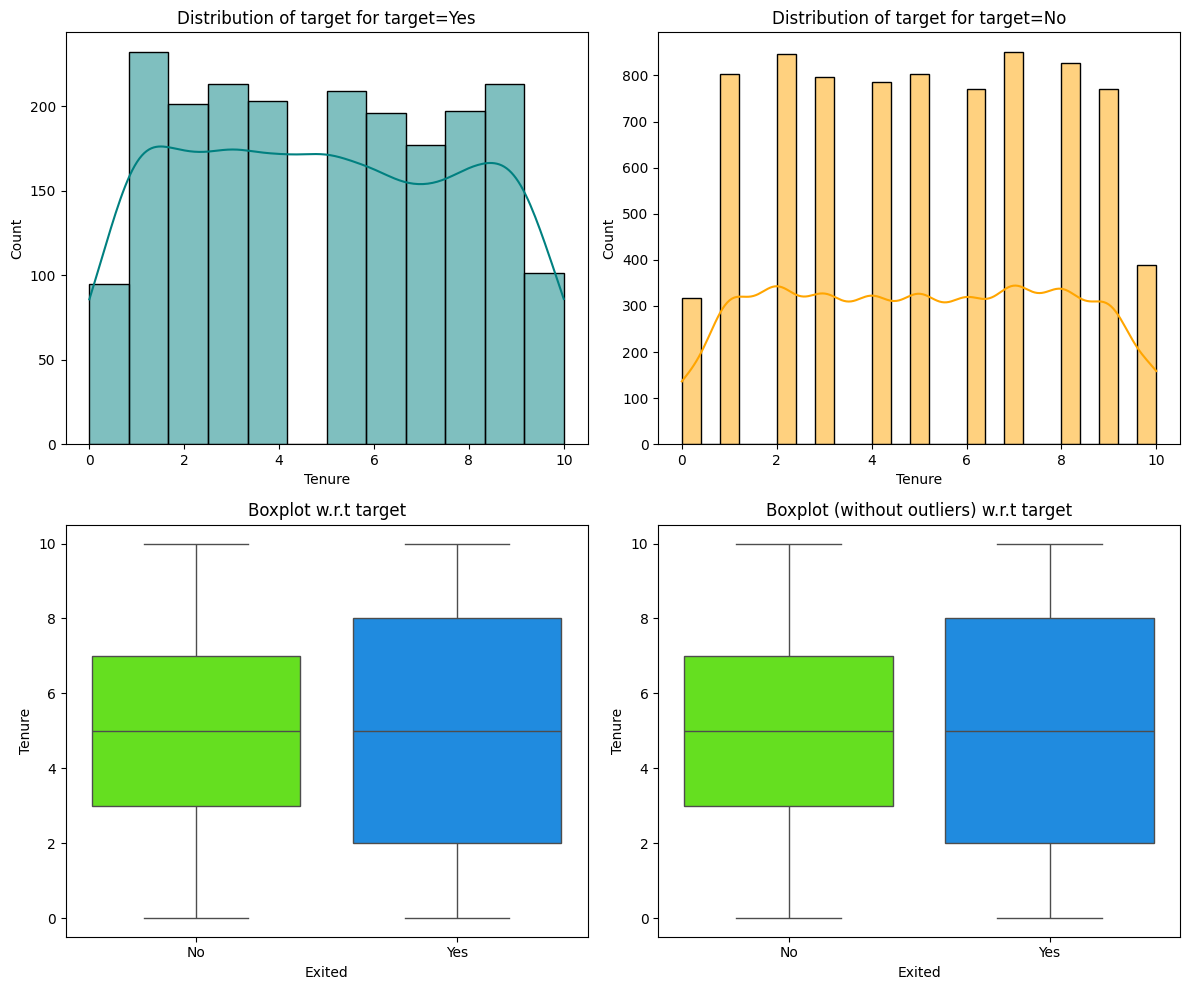

In [50]:
distribution_plot_wrt_target(df, 'Tenure', 'Exited')

* Tenure columns contains no outliers for both Exited and Non Exited categories.
* The distribution is roughly normal for both Exited and NotExited
* Interquartile range for exited customers is wider than for the ones who stayed.


#### NumOfProducts vs Exited

Exited           No   Yes    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


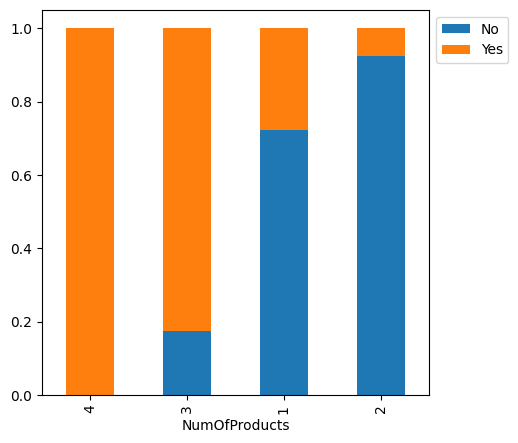

In [51]:
stacked_barplot(df, 'NumOfProducts', 'Exited')

* Customers who have 2 bank products are least likely to churn
* Customers who have 4 products are most likely to churn, followed by customers with three products

#### Balance vs Exited

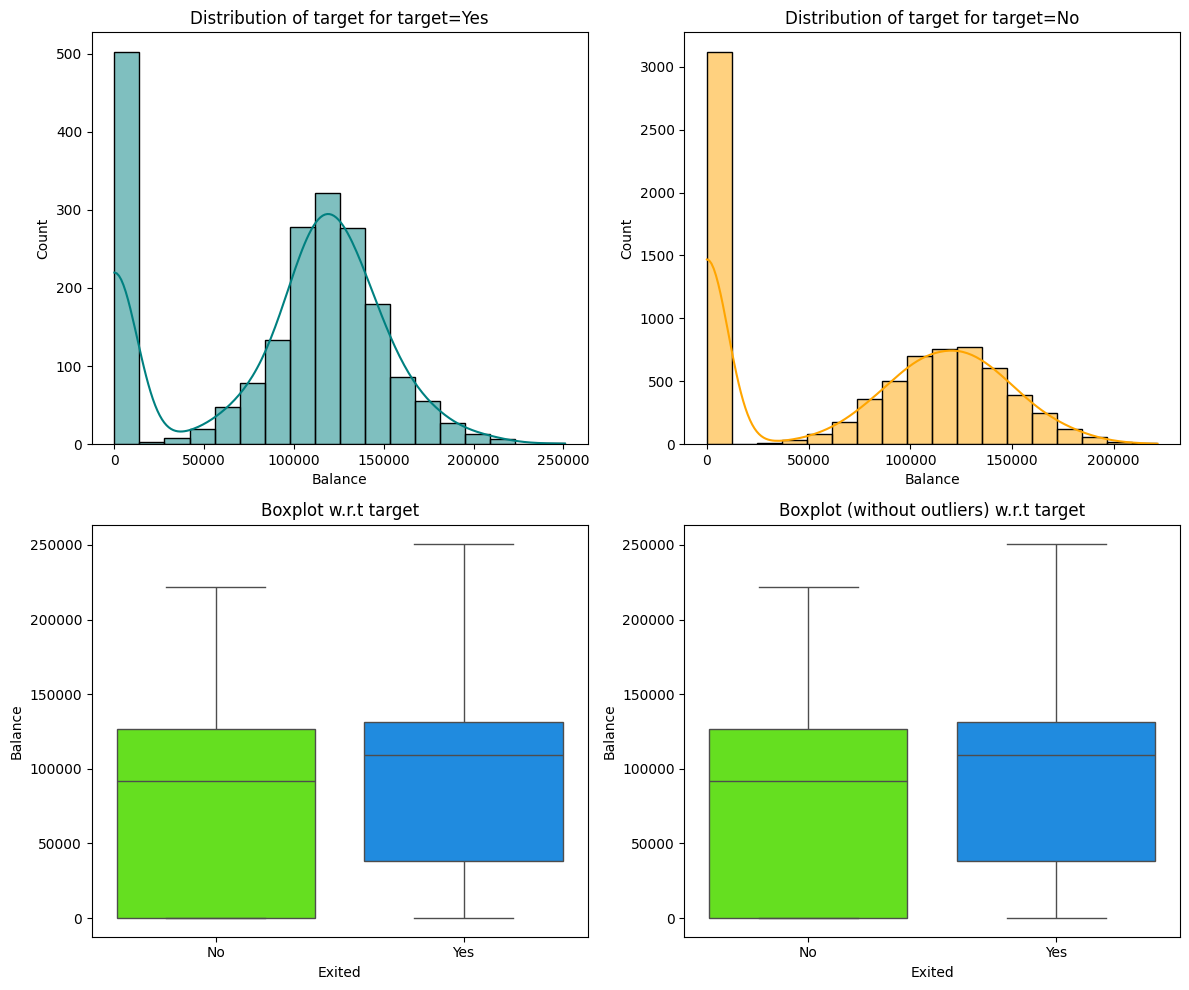

In [52]:
distribution_plot_wrt_target(df,'Balance', 'Exited')

* Customers with higher balanced are more likely to churn.

#### HasCrCard vs Exited

Exited       No   Yes    All
HasCrCard                   
All        7963  2037  10000
Yes        5631  1424   7055
No         2332   613   2945
------------------------------------------------------------------------------------------------------------------------


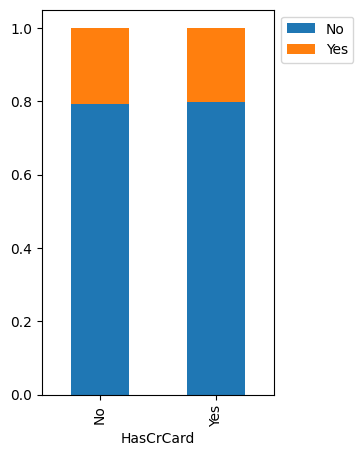

In [53]:
stacked_barplot(df, 'HasCrCard', 'Exited')

* Having a credit card doesn't have an effect on the churn

#### EstimatedSalary vs Exited

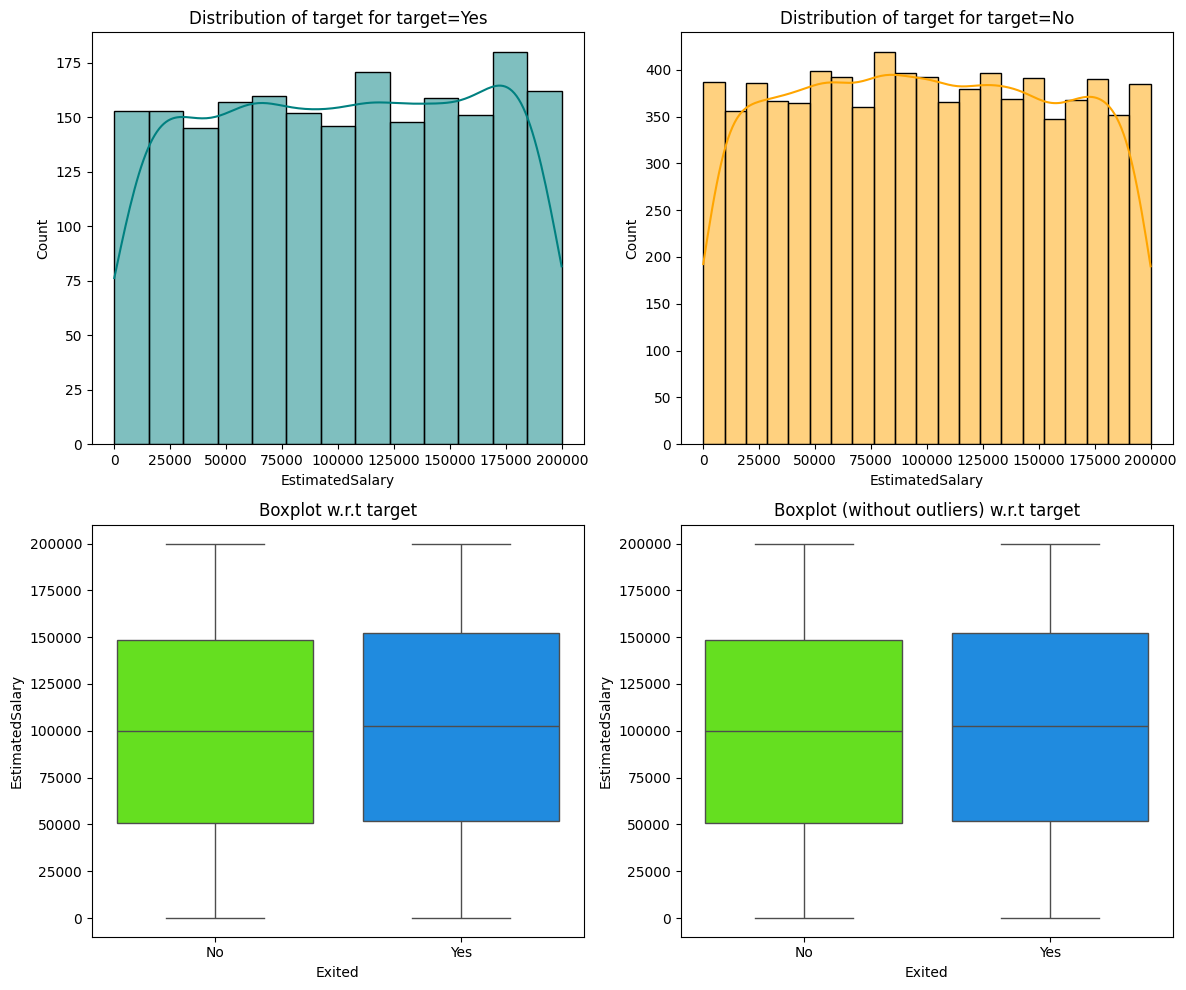

In [54]:
distribution_plot_wrt_target(df,'EstimatedSalary', 'Exited')

* Salary doesn't have an effect on Exited status.

#### IsActiveMember vs Exited

Exited            No   Yes    All
IsActiveMember                   
All             7963  2037  10000
No              3547  1302   4849
Yes             4416   735   5151
------------------------------------------------------------------------------------------------------------------------


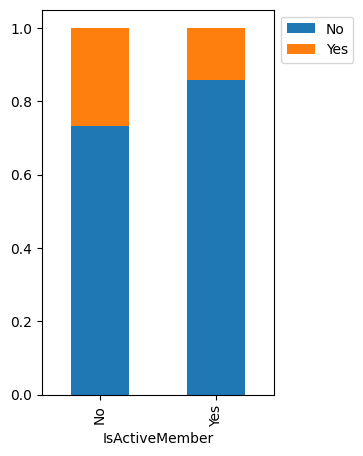

In [55]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

* Members who are not active are twice as likely to exit.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

#### Convert catergorical vars back to numeric

In [56]:
# convert categorical vars to numerical:
replaceStruct = {
                'HasCrCard': {'No':0, 'Yes':1},
                'IsActiveMember': {'No':0, 'Yes':1},
                'Exited': {'No':0, 'Yes':1},
                    }
df=df.replace(replaceStruct)

df['IsActiveMember'] = df['IsActiveMember'].astype('float64')
df['Exited'] = df['Exited'].astype('float64')
df['HasCrCard'] = df['HasCrCard'].astype('float64')

In [57]:
X = df.drop(['Exited'], axis=1)
y = df["Exited"]

In [58]:
X = pd.get_dummies(X, columns=["Geography","Gender"], drop_first=True)

In [59]:
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size = 0.2, stratify = y_tmp, shuffle = True, random_state=42)

Lets check the dimensions of our train, validation, and test datasets

In [60]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(6400, 11)
(1600, 11)
(2000, 11)


In [61]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(6400,)
(1600,)
(2000,)


#### Data Normalization

In [62]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,747,45,1,114959.12,1,1.0,0.0,189362.39,0,0,0
5735,585,44,4,0.00,2,0.0,1.0,101728.46,0,1,0
5652,691,29,9,0.00,2,0.0,0.0,199635.93,0,0,0
26,756,36,2,136815.64,1,1.0,1.0,170041.95,1,0,1
3596,643,36,0,148159.71,1,0.0,0.0,55835.66,0,0,1


In [63]:
#  scale numeric data
sc = StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])


## Model Building

### Model Evaluation Criterion

**Which metric to optimize?**

The metric that we want to optimize is Recall. Recall is the ratio of true positives to the sum of true positives and false negatives. It measures the proportion of actual Exited customers that are correctly identified by the model. By maximizing Recall, we can minimize the number of false negatives, which is important because incorrectly predicting that a customer will not leave when they actually are planning to exit can lead to loss of customer base and future profits. Therefore, we want to ensure that the maximum number of Exited customers are predicted correctly by the model.

#### Helper Functions

In [64]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

#### Model 1

In [65]:
backend.clear_session()
# setting random seed
seed_val = 42
np.random.seed(seed_val)
random.seed(seed_val)
tf.random.set_seed(seed_val)

In [66]:
#initialize the model
model = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=64, input_dim = 11,activation='relu'))   # input of 11 columns
# hidden layer
model.add(Dense(units=32,activation='relu'))
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification Exited or not

In [67]:
# Compile the model (using optimizer with default learning rate)
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
#fitting the model
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_val, y_val),batch_size=32)

Epoch 1/100
200/200 [==============================] - 4s 11ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4739 - accuracy: 0.7964 - val_loss: 0.4583 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4357 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4346 - accuracy: 0.8034 - val_loss: 0.4306 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.4254 - val_accuracy: 0.814

##### Loss Function

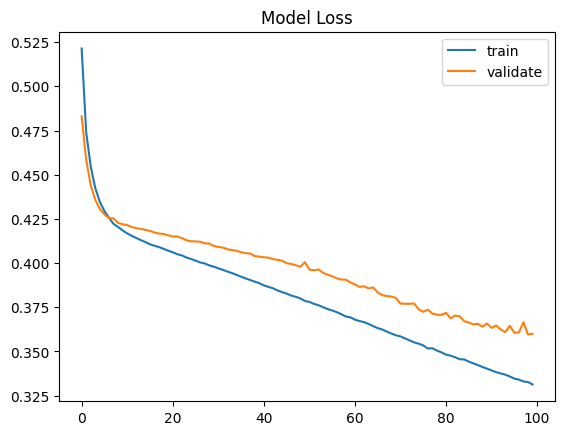

In [70]:
pyplot.title('Model Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

In [71]:
res = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8570


##### Confusion Matrix

In [72]:
y_predict = model.predict(X_val)
y_predict = (y_predict > 0.5)

50/50 [==============================] - 0s 1ms/step


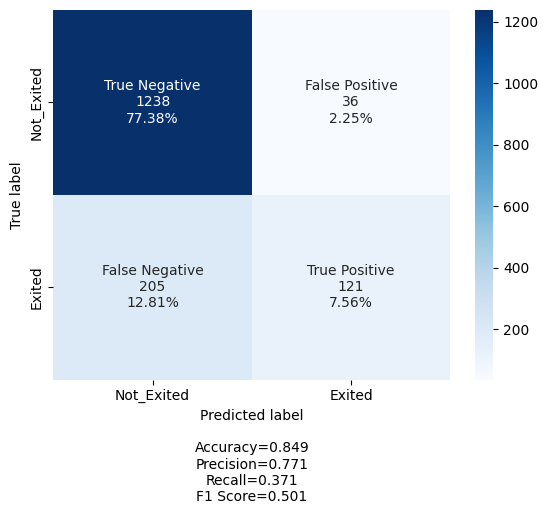

In [73]:
cm2=confusion_matrix(y_val, y_predict)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited', 'Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

#### Classification report

In [74]:
cr=metrics.classification_report(y_val,y_predict)
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1274
         1.0       0.77      0.37      0.50       326

    accuracy                           0.85      1600
   macro avg       0.81      0.67      0.71      1600
weighted avg       0.84      0.85      0.83      1600



* Loss curve on validation and training sets started to diverge. Accuracy value is decent - 85%, but the Recall value is about 37%, which is quite low.
* This is an inbalanced dataset, we should calculate the threshold using the AUC-ROC curve.
* Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

### Model Building: Neural Network model with Adam Optimizer

#### Model 2 - Adam Optimizer

In [75]:
backend.clear_session()
# setting random seed
seed_val = 42
np.random.seed(seed_val)
random.seed(seed_val)
tf.random.set_seed(seed_val)

In [76]:
#initialize the model
model_2 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_2.add(Dense(units=256, input_dim = 11,activation='relu', kernel_initializer='he_uniform'))   # input of 11 columns
# hidden layer
model_2.add(Dense(units=128,activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dense(units=64,activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dense(units=32,activation='relu', kernel_initializer='he_uniform'))
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model_2.add(Dense(1,activation='sigmoid'))                        # binary classification Exited or not

optimizer = Adam( learning_rate=0.001 )

# Compile the model
model_2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46337 (181.00 KB)
Trainable params: 46337 (181.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
#fitting the model
history_2=model_2.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
100/100 [==============================] - 3s 11ms/step - loss: 0.4304 - accuracy: 0.8134 - val_loss: 0.4088 - val_accuracy: 0.8219
Epoch 2/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3884 - accuracy: 0.8364 - val_loss: 0.3915 - val_accuracy: 0.8375
Epoch 3/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3663 - accuracy: 0.8450 - val_loss: 0.3972 - val_accuracy: 0.8231
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3521 - accuracy: 0.8498 - val_loss: 0.3714 - val_accuracy: 0.8444
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 0.3417 - accuracy: 0.8562 - val_loss: 0.3668 - val_accuracy: 0.8487
Epoch 6/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3307 - accuracy: 0.8606 - val_loss: 0.3727 - val_accuracy: 0.8456
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 0.3225 - accuracy: 0.8634 - val_loss: 0.3598 - val_accuracy: 0.8594
Epoch

#### Loss Function

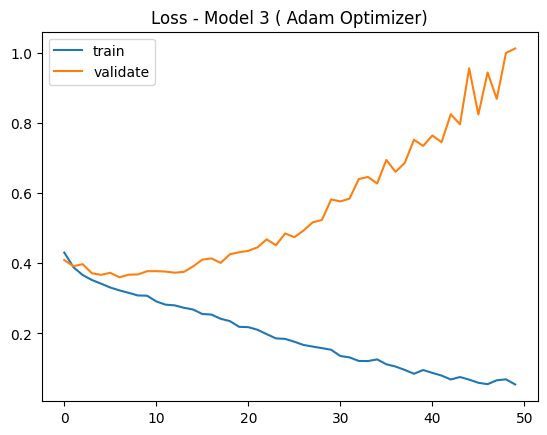

In [79]:
pyplot.title('Loss - Model 3 ( Adam Optimizer)')
pyplot.plot(history_2.history['loss'], label='train')
pyplot.plot(history_2.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

In [80]:
res = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8570


* Increased depth of neural network introduced noise. Loss curves on validation and training sets started to diverge fairly quickly in the training process. We should try reducing depth and perphaps a number of neurons and try an early stopping technique.

#### ROC-AUC Curve

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.102855, G-Mean=0.983


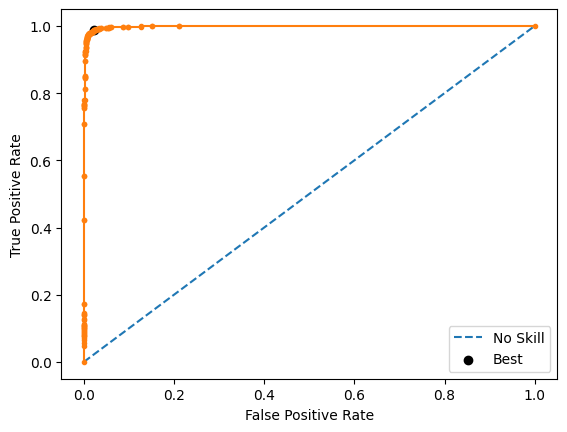

In [81]:
from sklearn.metrics import roc_curve

# predict probabilities
yhat = model_2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [82]:
#Predicting the results using best as a threshold
y_predict=model_2.predict(X_val)
y_predict = (y_predict > thresholds[ix])

50/50 [==============================] - 0s 2ms/step


#### Confusion Matrix

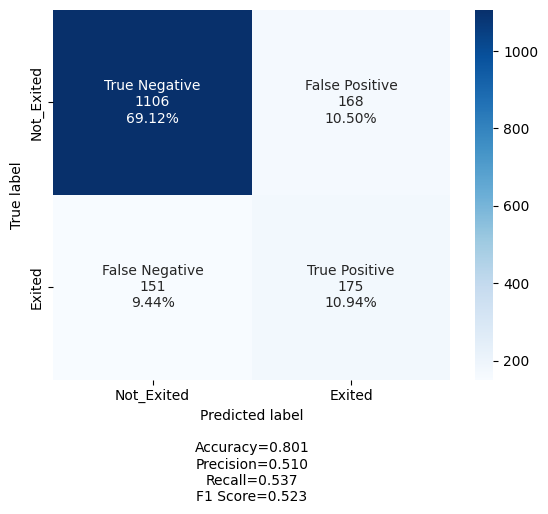

In [83]:
cm2=confusion_matrix(y_val, y_predict)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited', 'Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

#### Classification report

In [84]:
cr=metrics.classification_report(y_val,y_predict)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      1274
         1.0       0.51      0.54      0.52       326

    accuracy                           0.80      1600
   macro avg       0.70      0.70      0.70      1600
weighted avg       0.80      0.80      0.80      1600



* Optimizing treshold, and changing optimizer to Adam have improved Recall score to 54%.
* However the loss curve on validation and train sets diverged, so we over trained the model
* Loss curves on validation and training sets have more noise than before.
* Perphaps the number of neurons we were using is a bit of overkill.

#### Model 3 - Adam Optimizer + Early stopping

In [85]:
#initialize the model
model_3 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_3.add(Dense(units=256, input_dim = 11,activation='relu', kernel_initializer='he_uniform'))   # input of 11 columns
# hidden layer
model_3.add(Dense(units=128,activation='relu', kernel_initializer='he_uniform'))
model_3.add(Dense(units=64,activation='relu', kernel_initializer='he_uniform'))
model_3.add(Dense(units=32,activation='relu', kernel_initializer='he_uniform'))
# we have an output of 1 node, which is the the desired dimensions of our output (Exited or not)
# We use the sigmoid because we want probability outcomes
model_3.add(Dense(1,activation='sigmoid'))                        # binary classification Exited or not

optimizer = Adam( learning_rate=0.001 )

# Compile the model
model_3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [86]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46337 (181.00 KB)
Trainable params: 46337 (181.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4297 - accuracy: 0.8133 - val_loss: 0.4046 - val_accuracy: 0.8263
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3929 - accuracy: 0.8383 - val_loss: 0.4021 - val_accuracy: 0.8288
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3708 - accuracy: 0.8467 - val_loss: 0.4024 - val_accuracy: 0.8281
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3591 - accuracy: 0.8480 - val_loss: 0.3677 - val_accuracy: 0.8512
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3464 - accuracy: 0.8552 - val_loss: 0.3734 - val_accuracy: 0.8388
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3354 - accuracy: 0.8578 - val_loss: 0.3780 - val_accuracy: 0.8456
Epoch 7/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3274 - accuracy: 0.8631 - val_loss: 0.3822 - val_accuracy: 0.8506

#### Loss Function

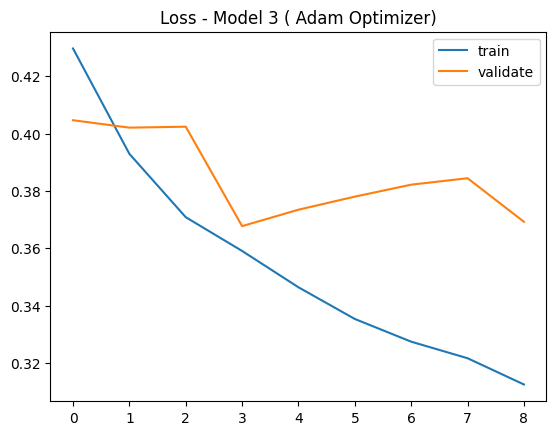

In [88]:
pyplot.title('Loss - Model 3 ( Adam Optimizer)')
pyplot.plot(history_3.history['loss'], label='train')
pyplot.plot(history_3.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

#### ROC-AUC Curve

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.197353, G-Mean=0.825


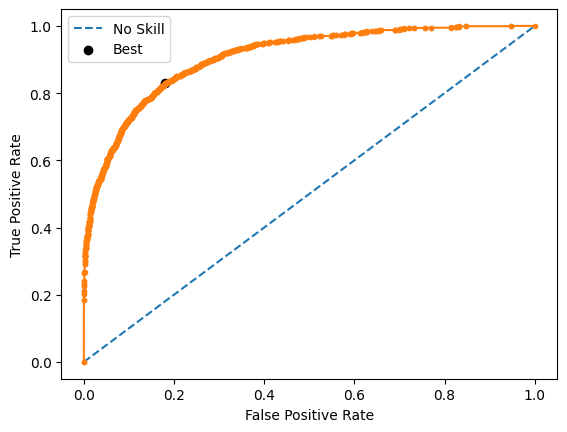

In [89]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [90]:
#Predicting the results using best as a threshold
y_predict=model_3.predict(X_val)
y_predict = (y_predict > thresholds[ix])

50/50 [==============================] - 0s 3ms/step


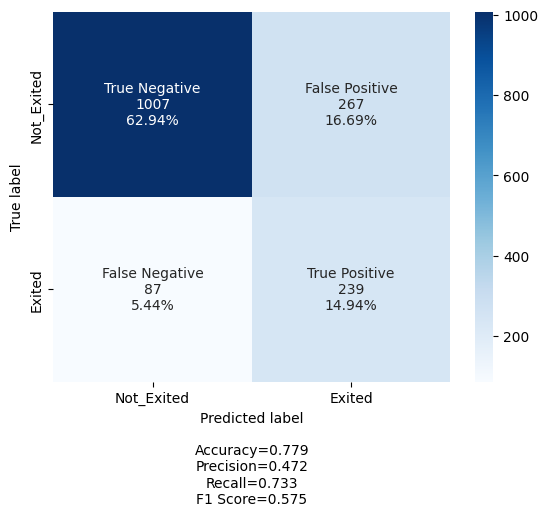

In [91]:
cm2=confusion_matrix(y_val, y_predict)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited', 'Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

#### Classification Report

In [92]:
cr=metrics.classification_report(y_val,y_predict)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      1274
         1.0       0.47      0.73      0.57       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.71      1600
weighted avg       0.83      0.78      0.79      1600



* Recall value has improved, and now is ~ 73.3 %.
* Loss curve on validation set doesn't look very smooth.
* Lets try Dropout technique to see if we can get more convincing results

### Model Improvement: Neural Network model with Dropout

##### Model 4 - with Dropout

In [93]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [94]:
#initialize the model
model_4 = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_4.add(Dense(units=32, input_dim = 11,activation='relu'))   # input of 11 columns
# Adding Dropout with 20%
model_4.add(Dropout(0.2))
# hidden layer
model_4.add(Dense(units=16,activation='relu'))
# Adding Dropout with 10%
model_4.add(Dropout(0.1))
model_4.add(Dense(8,activation='relu'))
# We use the sigmoid because we want probability outcomes
model_4.add(Dense(1,activation='sigmoid'))                        # binary classification Exited or not

model_4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [95]:
#fitting the model
history_4 = model_4.fit(X_train,y_train,batch_size=15,epochs=50,validation_data=(X_val, y_val))

Epoch 1/50
427/427 [==============================] - 4s 6ms/step - loss: 0.5962 - accuracy: 0.7258 - val_loss: 0.4628 - val_accuracy: 0.7962
Epoch 2/50
427/427 [==============================] - 2s 5ms/step - loss: 0.4457 - accuracy: 0.7964 - val_loss: 0.4351 - val_accuracy: 0.7994
Epoch 3/50
427/427 [==============================] - 2s 5ms/step - loss: 0.4317 - accuracy: 0.8009 - val_loss: 0.4253 - val_accuracy: 0.8094
Epoch 4/50
427/427 [==============================] - 2s 4ms/step - loss: 0.4304 - accuracy: 0.8084 - val_loss: 0.4199 - val_accuracy: 0.8194
Epoch 5/50
427/427 [==============================] - 2s 5ms/step - loss: 0.4183 - accuracy: 0.8219 - val_loss: 0.4151 - val_accuracy: 0.8263
Epoch 6/50
427/427 [==============================] - 2s 5ms/step - loss: 0.4133 - accuracy: 0.8241 - val_loss: 0.4113 - val_accuracy: 0.8269
Epoch 7/50
427/427 [==============================] - 1s 3ms/step - loss: 0.4075 - accuracy: 0.8278 - val_loss: 0.4010 - val_accuracy: 0.8400
Epoch 

#### Loss function

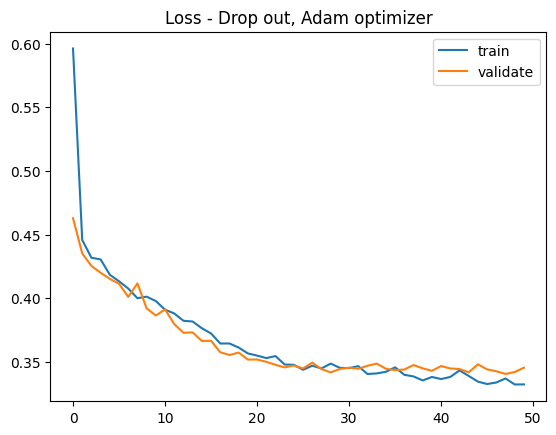

In [96]:
pyplot.title('Loss - Drop out, Adam optimizer')
pyplot.plot(history_4.history['loss'], label='train')
pyplot.plot(history_4.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

In [97]:
res = model_4.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8635


#### ROC-AUC Curve

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.154934, G-Mean=0.803


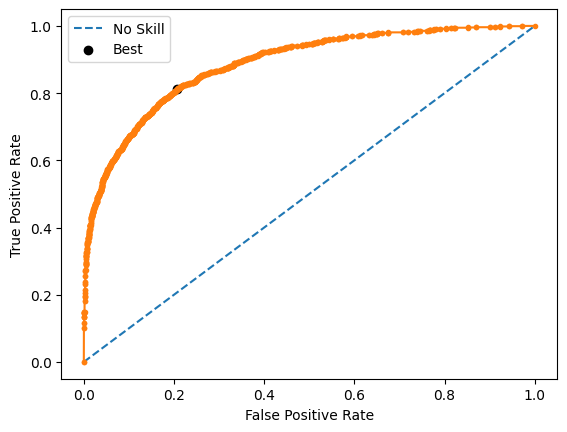

In [98]:
# predict probabilities
yhat = model_4.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [99]:
#Predicting the results using best as a threshold
y_predict=model_4.predict(X_val)
y_predict = (y_predict > thresholds[ix])

50/50 [==============================] - 0s 2ms/step


In [100]:
# this seems the best model so far, let's save the treshhold for future use
threshold_4 = thresholds[ix]

#### Confusion Matrix

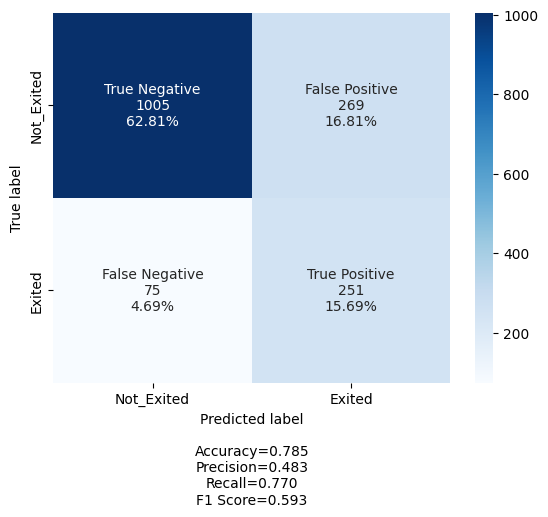

In [101]:
cm2=confusion_matrix(y_val, y_predict)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited', 'Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

#### Classification Report

In [102]:
cr=metrics.classification_report(y_val,y_predict)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85      1274
         1.0       0.48      0.77      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.72      1600
weighted avg       0.84      0.79      0.80      1600



* Slightly better recall value - 77%
* Loss curves on training and validation sets are similar.
* This is the best model so far.

### Model Improvement: Neural Network model with Hyperparameter tuning

In [103]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

##### Helper Functions

In [104]:
def create_model():
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(units=32,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.2))

    model.add(Dense(units=16,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=8,activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    return model

##### Model 5 - Grid Search CV

In [105]:
keras_estimator = KerasClassifier(model=create_model, loss = 'binary_crossentropy', optimizer = 'Adam')
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
batch_size = [64,32, 128]
param_grid = dict(optimizer__learning_rate=learn_rate, batch_size=batch_size)

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [106]:
grid_result = grid.fit(X_train, y_train,validation_data = (X_val,y_val),verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


Fitting 3 folds for each of 15 candidates, totalling 45 fits
200/200 [==============================] - 2s 5ms/step - loss: 0.4976 - val_loss: 0.4314
Best: 0.814531 using {'batch_size': 32, 'optimizer__learning_rate': 0.01}


**Let's apply best parameters obtained from hyperparameter tuning to our model**

In [107]:
best_params = grid_result.best_params_
best_params

{'batch_size': 32, 'optimizer__learning_rate': 0.01}

In [108]:
model_5 = create_model()

#compile model
learn_rate = best_params['optimizer__learning_rate']
batch_size = best_params['batch_size']

optimizer = Adam(learning_rate = learn_rate)
model_5.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                384       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4

In [109]:
#fitting the model
history_5 = model_5.fit(X_train,y_train,batch_size=batch_size,epochs=50,validation_data=(X_val, y_val))

Epoch 1/50
200/200 [==============================] - 3s 6ms/step - loss: 0.4612 - accuracy: 0.7917 - val_loss: 0.4306 - val_accuracy: 0.8062
Epoch 2/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4222 - accuracy: 0.8203 - val_loss: 0.4083 - val_accuracy: 0.8300
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8331 - val_loss: 0.4028 - val_accuracy: 0.8306
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3930 - accuracy: 0.8420 - val_loss: 0.3859 - val_accuracy: 0.8381
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3845 - accuracy: 0.8405 - val_loss: 0.3735 - val_accuracy: 0.8481
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3765 - accuracy: 0.8466 - val_loss: 0.3780 - val_accuracy: 0.8381
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3661 - accuracy: 0.8512 - val_loss: 0.3627 - val_accuracy: 0.8500
Epoch 

#### Loss Function

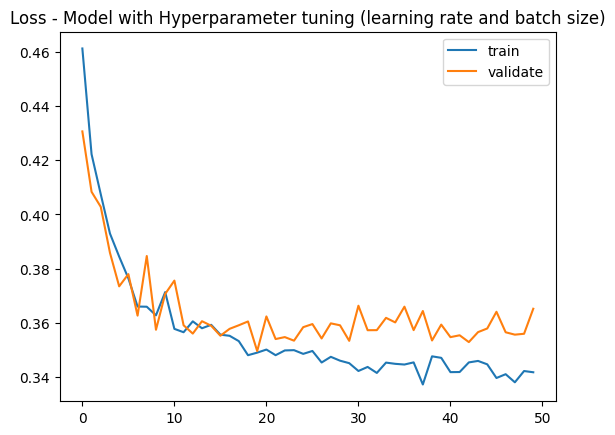

In [110]:
pyplot.title('Loss - Model with Hyperparameter tuning (learning rate and batch size)')
pyplot.plot(history_5.history['loss'], label='train')
pyplot.plot(history_5.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

#### ROC-AUC Curve

200/200 [==============================] - 1s 3ms/step
Best Threshold=0.165602, G-Mean=0.805


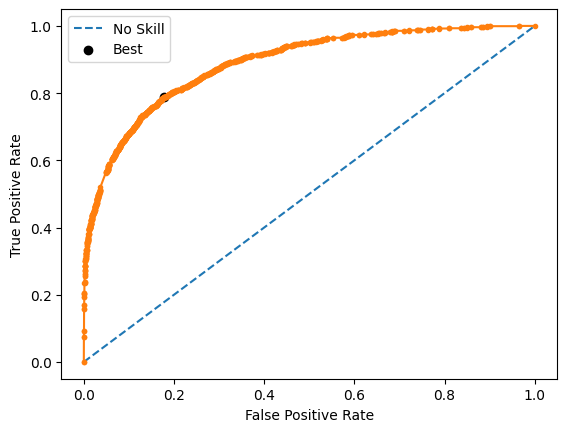

In [111]:
# predict probabilities
yhat = model_5.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predicting the results using  the best  threshold**

In [112]:
#Predicting the results using best as a threshold
y_predict=model_5.predict(X_val)
y_predict = (y_predict > thresholds[ix])

50/50 [==============================] - 0s 3ms/step


#### Confusion Matrix

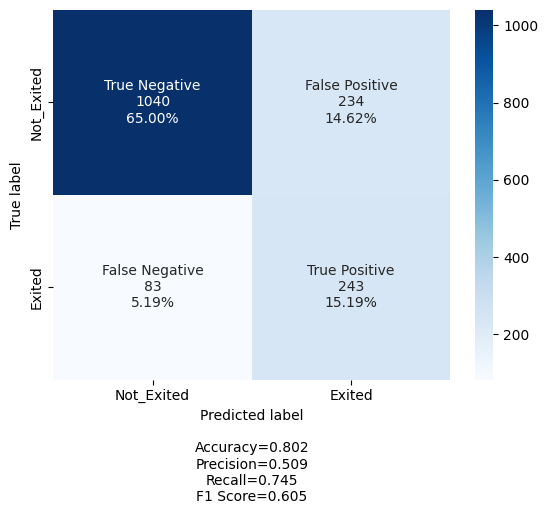

In [113]:
cm2=confusion_matrix(y_val, y_predict)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited', 'Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

#### Classification Report

In [114]:
cr=metrics.classification_report(y_val,y_predict)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      1274
         1.0       0.51      0.75      0.61       326

    accuracy                           0.80      1600
   macro avg       0.72      0.78      0.74      1600
weighted avg       0.84      0.80      0.81      1600



* Recall is not as good as in the previous model
* Loss curves have a lot of noise
* Loss curves started to diverge, so the model is overtrained.
* Overall, results of grid search are a bit disappointing.

### Model Improvement: Neural Network model with balanced data

In [115]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

#### Model 6 - SMOTE

In [116]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train , y_train = smote.fit_resample(X_train,y_train)

y_train.value_counts()

1.0    5096
0.0    5096
Name: Exited, dtype: int64

In [117]:
model_6 = create_model()
optimizer = Adam(0.001)
model_6.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [118]:
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history_6 = model_6.fit(X_train,y_train,batch_size=16,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100
637/637 [==============================] - 3s 3ms/step - loss: 0.6464 - accuracy: 0.6483 - val_loss: 0.6617 - val_accuracy: 0.7131
Epoch 2/100
637/637 [==============================] - 2s 3ms/step - loss: 0.5934 - accuracy: 0.7199 - val_loss: 0.6048 - val_accuracy: 0.7431
Epoch 3/100
637/637 [==============================] - 2s 3ms/step - loss: 0.5607 - accuracy: 0.7356 - val_loss: 0.5768 - val_accuracy: 0.7437
Epoch 4/100
637/637 [==============================] - 2s 3ms/step - loss: 0.5394 - accuracy: 0.7502 - val_loss: 0.5472 - val_accuracy: 0.7594
Epoch 5/100
637/637 [==============================] - 2s 4ms/step - loss: 0.5200 - accuracy: 0.7578 - val_loss: 0.5287 - val_accuracy: 0.7663
Epoch 6/100
637/637 [==============================] - 3s 4ms/step - loss: 0.5107 - accuracy: 0.7624 - val_loss: 0.5499 - val_accuracy: 0.7525
Epoch 7/100
637/637 [==============================] - 3s 4ms/step - loss: 0.5012 - accuracy: 0.7705 - val_loss: 0.5023 - val_accuracy: 0.7650

#### Loss function

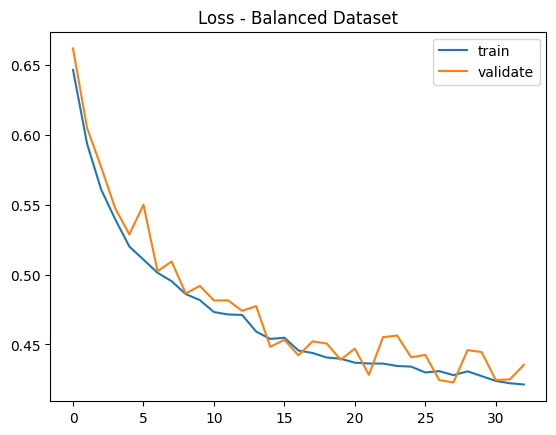

In [119]:
pyplot.title('Loss - Balanced Dataset')
pyplot.plot(history_6.history['loss'], label='train')
pyplot.plot(history_6.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

#### ROC-AUC Curve

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.444591, G-Mean=0.825


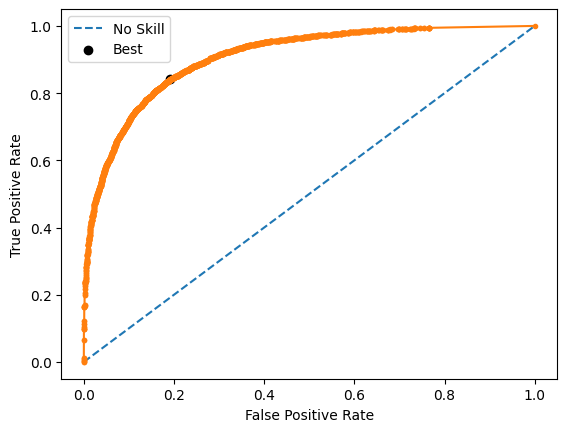

In [120]:
# predict probabilities
yhat = model_6.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

* Treshold is very close to 0.5, which is not surprizing since we balanced our dataset.

**Predicting the results using  the best  threshold**

In [121]:
#Predicting the results using best as a threshold
y_predict=model_6.predict(X_val)
y_predict = (y_predict > thresholds[ix])

50/50 [==============================] - 0s 2ms/step


#### Confusion Matrix

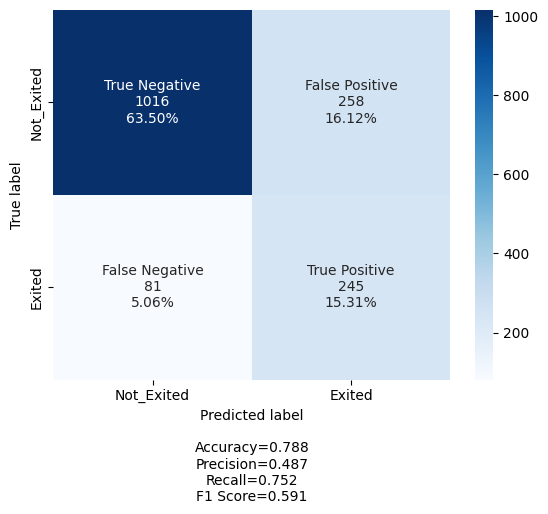

In [122]:
cm2=confusion_matrix(y_val, y_predict)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited', 'Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

#### Classification Report

In [123]:
cr=metrics.classification_report(y_val,y_predict)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      1274
         1.0       0.49      0.75      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.77      0.72      1600
weighted avg       0.84      0.79      0.80      1600



* Recall is about 70% with is not as good as some of the previous models
* Loss curves are also not as smooth as we've seen for some of the models

## Final Model

* Model 4 seems to be the best model. Lets select it for our final model, and evaluate its performance on the test set

In [124]:
test_pred = model_4.predict(X_test)
test_pred = (test_pred > threshold_4)

63/63 [==============================] - 0s 2ms/step


#### Confusion Matrix

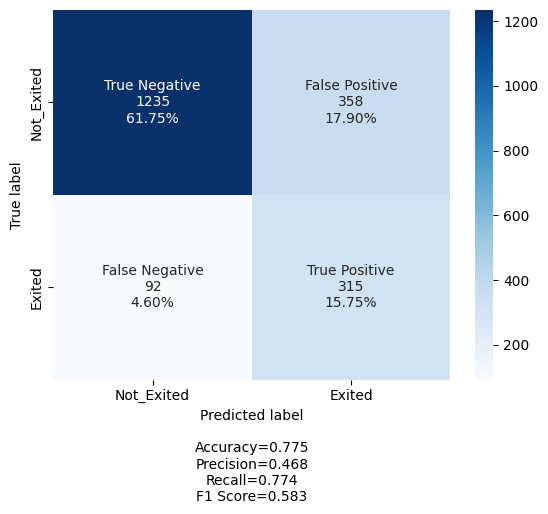

In [125]:
cm2=confusion_matrix(y_test, test_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited', 'Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

* Recall score is about 77%, with 92 false negatives
* Model performance on test and train set is very similar

#### Classification report

In [126]:
cr=metrics.classification_report(y_test,test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      1593
         1.0       0.47      0.77      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.78      0.79      2000



## Actionable Insights and Recommendations

* Average customer is around 39 years old. The Bank should tailor services to meet the needs of customers in their thirties and early forties.
* Customers are from France, Germany, and Spain. ~55% male, ~45% female. The Bank should customize marketing strategies for each country, explore gender-specific offerings, and  consider expanding its customer base in other countries to reduce the risk of over-reliance on a single country.
* In the last year bank acquired less than half of the new customers compared to previous year. In addition to focusing on retaining existing customers, Bank should investigate the decline in new customer acquisition.
* Bank should analyze and segment customers based on balance clusters - accounts with low and high balances, offer targeted products.
* 20% of the customers have left the bank within six months. German and female customers are more likely to leave. Bank should investigate reasons for churn, especially among German customers and females. Focus on retaining high-balance customers.
* Customers with 2 products least likely to churn; 4 products most likely. Bank should encourage customers with fewer products to explore additional offerings; monitor and engage with customers holding 4 products.
* Higher balances associated with higher churn. Bank should implement strategies to retain high-balance customers; explore reasons for churn in this segment.
* Inactive members twice as likely to exit. Bank should implement initiatives to increase member activity and engagement.
* We have build a neural network model Bank can deploy to identify with a reasonable degree of accuracy whether a customer will leave the bank in the next six month.


In [128]:
%%shell
jupyter nbconvert --to html /content/INN_Learner_Notebook_Full_code_version.ipynb

[NbConvertApp] Converting notebook /content/INN_Learner_Notebook_Full_code_version.ipynb to html
[NbConvertApp] Writing 2621885 bytes to /content/INN_Learner_Notebook_Full_code_version.html
